# **Module 3 Airport Data Set**

# Preproccess Data

In [556]:
import pandas as pd 
#I like to use pandas to import my dataframe

In [557]:
air=pd.read_csv(r'mod3Data.csv')
#read the csv

In [558]:
print(air.head(14))
#prints the dataframe, top 5 rows in this case, can change to larger number

       CAMIS  ...                          INSPECTION TYPE
0   41701986  ...    Cycle Inspection / Initial Inspection
1   40660748  ...    Cycle Inspection / Initial Inspection
2   41494987  ...         Cycle Inspection / Re-inspection
3   50050828  ...    Cycle Inspection / Initial Inspection
4   50012518  ...  Cycle Inspection / Reopening Inspection
5   41072888  ...    Cycle Inspection / Initial Inspection
6   41311425  ...         Cycle Inspection / Re-inspection
7   41373642  ...         Cycle Inspection / Re-inspection
8   50019033  ...  Cycle Inspection / Reopening Inspection
9   41512878  ...         Cycle Inspection / Re-inspection
10  50037684  ...    Cycle Inspection / Initial Inspection
11  41241636  ...         Cycle Inspection / Re-inspection
12  41701986  ...    Cycle Inspection / Initial Inspection
13  41139783  ...    Cycle Inspection / Initial Inspection

[14 rows x 15 columns]


In [559]:
print(air.isnull())
#show null values

       CAMIS    DBA  AIRPORT  ...  GRADEDATE  RECORD DATE  INSPECTION TYPE
0      False  False    False  ...      False        False            False
1      False  False    False  ...      False        False            False
2      False  False    False  ...      False        False            False
3      False  False    False  ...      False        False            False
4      False  False    False  ...      False        False            False
...      ...    ...      ...  ...        ...          ...              ...
18410  False  False    False  ...      False        False            False
18411  False  False    False  ...      False        False            False
18412  False  False    False  ...      False        False            False
18413  False  False    False  ...      False        False            False
18414  False  False    False  ...      False        False            False

[18415 rows x 15 columns]


In [560]:
print(air.isnull().sum().sum())
#counts all null values in data frame (both column and rows)

4253


In [561]:
print(air.isnull().sum())
#counts all null values in each column

CAMIS                       0
DBA                         0
AIRPORT                  4047
BUILDING                    8
CUISINE DESCRIPTION         0
INSPECTION DATE             0
ACTION                      0
VIOLATION CODE             89
VIOLATION DESCRIPTION     109
CRITICAL FLAG               0
SCORE                       0
GRADE                       0
GRADEDATE                   0
RECORD DATE                 0
INSPECTION TYPE             0
dtype: int64


In [562]:
print(air.DBA.describe())
#describes the DBA column as you can see dunkin donuts is the most frequent

count              18415
unique              9989
top       DUNKIN' DONUTS
freq                 258
Name: DBA, dtype: object


In [ ]:
#https://machinelearningmastery.com/handle-missing-data-python/

#shows how to imput and remove missing values

#imputation should be used if 10% or less of data is missing 
#is record date important? 
#removing columns depends on the analyst, one could leave it or one could remove, I would remove grade, and keep date, as some sort of tracking 

# Data Visulization

In [ ]:
####MODULE 3 Presentation

### Import Data Libaries

In [564]:
# Import Data Libaries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Print Total Number of Airports

In [565]:
#Total number of Airports, 17489, most popular airport is ABI
print(air.AIRPORT.describe()) 

count     14368
unique      327
top         ABI
freq       1376
Name: AIRPORT, dtype: object


### Create New Dataframe to get frequency data of Airport and DBA column

In [566]:
AIRPORTDBA=pd.DataFrame(air)

In [567]:
AIRPORTDBA[['AIRPORT', 'DBA']].mean()

Series([], dtype: float64)

In [568]:
AIRPORTDBA[['AIRPORT', 'DBA']].describe()

,AIRPORT,DBA
count,14368,18415
unique,327,9989
top,ABI,DUNKIN' DONUTS
freq,1376,258


In [569]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

### Plot Airport and DBA

Seperate vlaues into X and Y varibles

In [574]:
# Set dataset as new dataframe and drop null values
dataset = AIRPORTDBA
df = dataset
df.dropna()
x = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2:3].values

type(df)


pandas.core.frame.DataFrame

In [575]:
print(x)

[['LA VILLA CAFE']
 ['ALTA']
 ['BROOKLYN FARMACY AND SODA FOUNTAIN']
 ...
 ['CARRY ON TEA & SYMPATHY']
 ['KENNEDY FRIED CHICKEN']
 ['J & M BAKERY']]


In [572]:
print(y)

[['ABI']
 ['ABI']
 ['SPS']
 ...
 ['DEN']
 ['CWA']
 ['CRP']]


In [573]:
print(df.columns)
df.head(10)


Index(['CAMIS', 'DBA', 'AIRPORT', 'BUILDING', 'CUISINE DESCRIPTION',
       'INSPECTION DATE', 'ACTION', 'VIOLATION CODE', 'VIOLATION DESCRIPTION',
       'CRITICAL FLAG', 'SCORE', 'GRADE', 'GRADEDATE', 'RECORD DATE',
       'INSPECTION TYPE'],
      dtype='object')


,CAMIS,DBA,AIRPORT,BUILDING,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADEDATE,RECORD DATE,INSPECTION TYPE
0,41701986,LA VILLA CAFE,ABI,505,Spanish,9/30/2016,Violations were cited in the following area(s).,04H,"Raw, cooked or prepared food is adulterated, c...",Critical,12,A,9/30/2016,8/28/2017,Cycle Inspection / Initial Inspection
1,40660748,ALTA,ABI,64,American,9/30/2016,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,8,A,9/30/2016,8/28/2017,Cycle Inspection / Initial Inspection
2,41494987,BROOKLYN FARMACY AND SODA FOUNTAIN,SPS,513,American,9/30/2016,Violations were cited in the following area(s).,10H,Proper sanitization not provided for utensil w...,Not Critical,13,A,9/30/2016,8/28/2017,Cycle Inspection / Re-inspection
3,50050828,KARIBBEAN GREEN,TUS,804,Caribbean,9/30/2016,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Critical,13,A,9/30/2016,8/28/2017,Cycle Inspection / Initial Inspection
4,50012518,RED STAR sandwich shop,DSM,176,Asian,9/30/2016,Establishment re-opened by DOHMH,04L,Evidence of mice or live mice present in facil...,Critical,9,P,9/30/2016,8/28/2017,Cycle Inspection / Reopening Inspection
5,41072888,ROSELLA'S PIZZERIA,CLL,164,Pizza,9/30/2016,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,8,A,9/30/2016,8/28/2017,Cycle Inspection / Initial Inspection
6,41311425,DEAN & DELUCA NEW YORK,BZN,632,American,9/30/2016,Violations were cited in the following area(s).,06A,Personal cleanliness inadequate. Outer garment...,Critical,17,B,9/30/2016,8/28/2017,Cycle Inspection / Re-inspection
7,41373642,SUBWAY,OAJ,21,Sandwiches,9/30/2016,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,10,A,9/30/2016,8/28/2017,Cycle Inspection / Re-inspection
8,50019033,DIY KARAOKE,HYA,13335,Asian,9/30/2016,Establishment re-opened by DOHMH,04L,Evidence of mice or live mice present in facil...,Critical,9,P,9/30/2016,8/28/2017,Cycle Inspection / Reopening Inspection
9,41512878,LA SLOWTERIA,CRP,548,American,9/30/2016,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,14,B,9/30/2016,8/28/2017,Cycle Inspection / Re-inspection


### Seperate all my posible Independant varible for calulations

In [356]:
df['AIRPORT'].describe()

count     41186
unique      328
top         ABI
freq       2078
Name: AIRPORT, dtype: object

In [357]:
df['DBA'].describe()

count              41186
unique             14781
top       DUNKIN' DONUTS
freq                 522
Name: DBA, dtype: object

In [358]:
df['DBA'].describe()

count              41186
unique             14781
top       DUNKIN' DONUTS
freq                 522
Name: DBA, dtype: object

**Make sure there are no defined catigorical types**

`### HOW DO I COMPUT MULTIPLE COLUMNS TO DROP NULL VALUES?`

In [359]:
df = df.dropna(subset=['AIRPORT'])
df['AIRPORT'] = df['AIRPORT'].replace(to_replace={'.*NULL.*': 'ABI'}, regex=True)

In [360]:
df = df.dropna(subset=['DBA'])
df['DBA'] = df['DBA'].replace(to_replace={'.*NULL.*': 'ABI'}, regex=True)

In [361]:
df = df[(df['AIRPORT'] != 'undefined')]
df['AIRPORT'].unique()

array(['ABE', 'ABI', 'ABQ', 'ABR', 'ABY', 'ACK', 'ACT', 'ACV', 'ACY',
       'ADK', 'ADQ', 'AEX', 'AGS', 'AKN', 'ALB', 'AZO', 'BDL', 'BET',
       'BFL', 'BGM', 'BGR', 'BHM', 'BIL', 'BIS', 'BJI', 'BLI', 'BMI',
       'BNA', 'BOI', 'BOS', 'BPT', 'BQK', 'BQN', 'BRD', 'BRO', 'BRW',
       'BTM', 'BTR', 'BTV', 'BUF', 'BUR', 'BWI', 'BZN', 'CAE', 'CAK',
       'CDC', 'CDV', 'CEC', 'CHA', 'CHO', 'CHS', 'CID', 'CIU', 'CLD',
       'CLE', 'CLL', 'CLT', 'CMH', 'CMI', 'CMX', 'CNY', 'COD', 'COS',
       'COU', 'CPR', 'CRP', 'CRW', 'CSG', 'CVG', 'CWA', 'DAB', 'DAL',
       'DAY', 'DBQ', 'DCA', 'DEN', 'DFW', 'DHN', 'DIK', 'DLG', 'DLH',
       'DRO', 'DSM', 'DTW', 'DVL', 'EAU', 'ECP', 'EGE', 'EKO', 'ELM',
       'ELP', 'ERI', 'ESC', 'EUG', 'EVV', 'EWN', 'EWR', 'EYW', 'FAI',
       'FAR', 'FAT', 'FAY', 'FCA', 'FLG', 'FLL', 'FNT', 'FSD', 'FSM',
       'FWA', 'GCC', 'GCK', 'GEG', 'GFK', 'GGG', 'GJT', 'GNV', 'GPT',
       'GRB', 'GRI', 'GRK', 'GRR', 'GSO', 'GSP', 'GST', 'GTF', 'GTR',
       'GUC', 'GUM',

In [417]:
df = df[(df['DBA'] != 'undefined')]
df['DBA'].unique()

array(['NOTARO RESTAURANT', 'VITE BAR', "TACK'S CHINESE TAKE OUT", ...,
       'PRETZEL MAKER', 'EAT-A-BAGEL (ANDREW J. BARBERI FERRY)',
       'TWO BOOTS MIDTOWN EAST'], dtype=object)

In [363]:
gp1 = df.groupby(by=['AIRPORT'])
dba_avg = gp1.mean()
dba_ct = gp1.count()


                                     CAMIS  SCORE
DBA                                              
#1 GARDEN CHINESE               41568346.0  28.50
#1 Natural Juice Bar            50051964.0  11.00
#1 SABOR LATINO RESTAURANT      41336841.0  27.75
$1 PIZZA                        50061194.0  28.00
$1 PIZZA $2 BEER                41652560.0  29.50
...                                    ...    ...
cafe paulette                   50050281.0  13.00
city of saints coffee roasters  50009816.0    NaN
energy fuel                     50002105.0   7.00
re.union                        50014243.0  38.00
taci's beyti restaurant         50001473.0  19.00

[14781 rows x 2 columns]


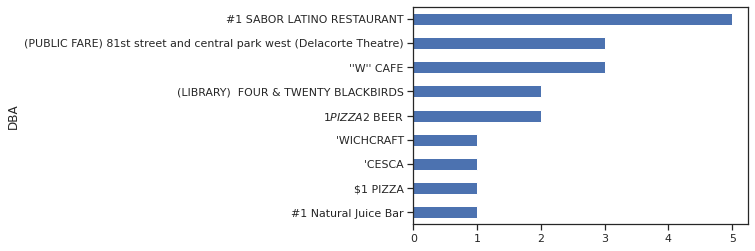

In [421]:
gp2 = df.groupby(by=['DBA'])

dba_avg2 = gp2.mean()
dba_ct2 = gp2.count()

print(dba_avg2)
dba_ct2.iloc[1:10,1].sort_values().plot(kind='barh')

In [365]:
df['DBA'].head()

0          NOTARO RESTAURANT
1          NOTARO RESTAURANT
2                   VITE BAR
3    TACK'S CHINESE TAKE OUT
4                 NO QUARTER
Name: DBA, dtype: object

In [ ]:
df['AIRPORT'].head()

In [ ]:
data1 = dba_ct.iloc[:,1]
print(data1)

AttributeError: ignored

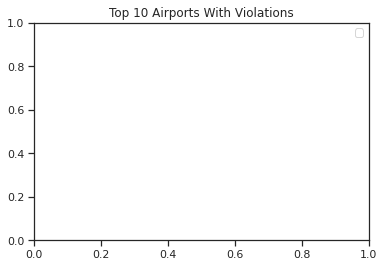

In [422]:
count_series = dba_avg.iloc[:10,0]

plt.title('Top 10 Airports With Violations')
plt.legend('Airport')
count_series.plot(kind='barh')


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statistics


N = 5
x = dba_avg
y = dba_ct

std = statistics.variance(dba_avg)

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, x, width, yerr=std)
p2 = plt.bar(ind, y, width,
             bottom=x, yerr=y)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

**One Hot encode X vairibles**

In [346]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
x = np.array(ct.fit_transform(x))


In [152]:
tgrouped=.groupby(['AIRPORT']).count()

In [153]:
tgrouped.head(5)

,CAMIS,DBA,BUILDING,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
AIRPORT,,,,,,,,,,,,,,
ABE,1504,1504,1503,1504,1504,1501,1478,1504,1504,1416,748,739,1504,1501
ABI,2078,2078,2078,2078,2078,2070,2030,2078,2078,1934,963,950,2078,2070
ABQ,18,18,18,18,18,18,18,18,18,18,10,10,18,18
ABR,18,18,18,18,18,18,18,18,18,17,8,8,18,18
ABY,18,18,18,18,18,18,18,18,18,17,6,6,18,18


In [313]:
t = tgrouped.sort_values(by='AIRPORT', ascending=False)[2:10]

In [314]:
print(t)

         CAMIS  DBA  BUILDING  ...  GRADE DATE  RECORD DATE  INSPECTION TYPE
AIRPORT                        ...                                          
XNA         72   72        72  ...          38           72               71
WYS         87   87        87  ...          34           87               87
WRG         75   75        75  ...          33           75               75
WED          9    9         9  ...           3            9                9
VPS         75   75        75  ...          32           75               74
VLD         75   75        75  ...          30           75               75
VEL         78   78        78  ...          40           78               78
UST         75   75        75  ...          36           75               74

[8 rows x 14 columns]


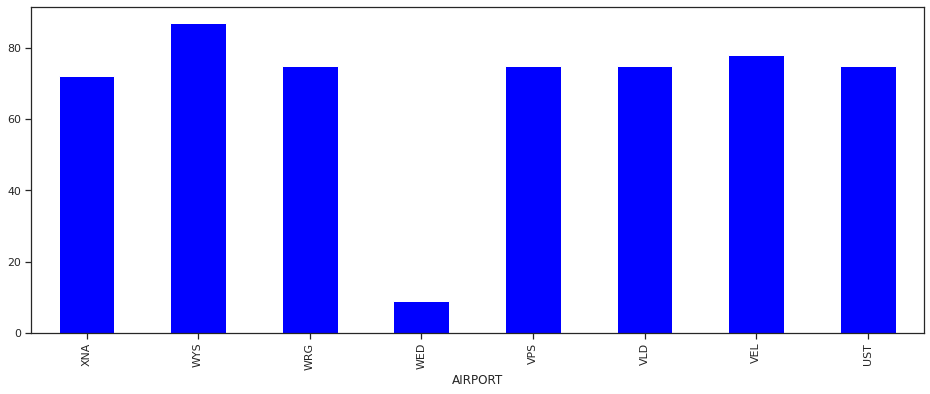

In [315]:
t['DBA'].plot(kind='bar', stacked=True, figsize=[16,6], colormap='winter') 

In [ ]:
# AIRPORTDBA.groupby('AIRPORT')['DBA'].mean()

### Imputate values in Violation description Column

In [18]:
import matplotlib.pyplot as plt

In [455]:
# Replace missing values with a value
AIRPORTDBA['VIOLATION DESCRIPTION'].fillna('non-contact surface', inplace=True)

In [456]:
AIRPORTDBA['DBA'].fillna("DUNKIN' DONUTS", inplace=True)

### Import SeaBorn Libary

In [58]:
import seaborn as sns
%matplotlib inline 
#to plot the graphs inline on jupyter notebook

### Save data frame into a varible

In [59]:
t=AIRPORTDBA

### Print Data Frame T

In [ ]:
t.head()

### Group column VOLATION DESCRIPTION as Independant varable

In [449]:
tgrouped=AIRPORTDBA.groupby(['CUISINE DESCRIPTION']).count()

### Print Dependant head

In [450]:
tgrouped.head(20)

,CAMIS,DBA,AIRPORT,BUILDING,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
CUISINE DESCRIPTION,,,,,,,,,,,,,,
Afghan,21,21,18,21,21,21,21,21,21,20,12,12,21,21
African,180,180,141,180,180,180,179,180,180,169,81,80,180,180
American,11577,11577,9369,11569,11577,11575,11418,11577,11577,10878,5843,5774,11577,11575
Armenian,65,65,53,65,65,65,65,65,65,63,29,28,65,65
Asian,824,824,656,824,824,823,814,824,824,783,376,368,824,823
Australian,36,36,33,36,36,36,35,36,36,35,19,19,36,36
Bagels/Pretzels,357,357,297,357,357,357,353,357,357,339,179,176,357,357
Bakery,1485,1485,1236,1485,1485,1484,1462,1485,1485,1408,728,720,1485,1484
Bangladeshi,106,106,86,106,106,106,103,106,106,99,40,40,106,106


### Sort new dataframe by violations for first 3 colums

In [452]:
test=tgrouped.sort_values(by='VIOLATION DESCRIPTION', ascending=False)[:3]

In [453]:
print(test)

                                                    CAMIS  ...  INSPECTION TYPE
CUISINE DESCRIPTION                                        ...                 
American                                            11577  ...            11575
Chinese                                              5343  ...             5343
Latin (Cuban, Dominican, Puerto Rican, South & ...   2474  ...             2474

[3 rows x 14 columns]


### Plot 2 columns of new data frame

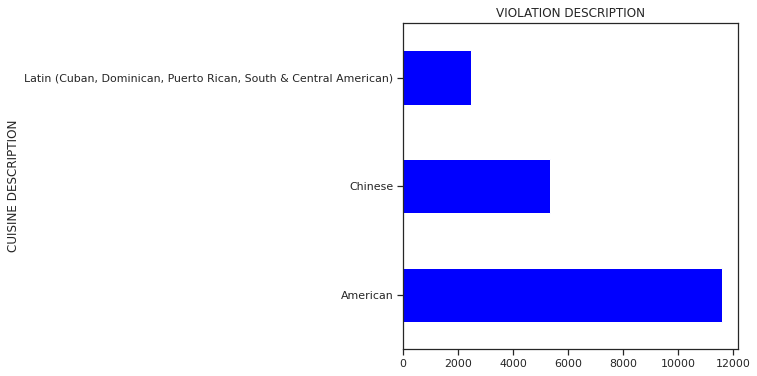

In [454]:
test['VIOLATION DESCRIPTION'].plot(kind='barh', stacked=False, figsize=[6,6], colormap='winter',  style='g',  subplots=True) 
ax.invert_xaxis()

# **Total Number of restaurants at Each airport**

In [563]:
# Get stat data on columns used for calulations
df[['DBA', 'AIRPORT']].describe()

,DBA,AIRPORT
count,51097,41186
unique,15866,328
top,DUNKIN' DONUTS,ABI
freq,633,2078


# **Restaurants With Highest Grade**

In [ ]:
# Import Data Libaries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline 
#to plot the graphs inline on jupyter notebook

In [ ]:
# Label new dataframe
df = AIRPORTDBA

In this section we will check the resaurants that have the highest grades

In [ ]:
# Get stat data on columns used for calulations
df[['GRADE', 'DBA']].describe()

In [469]:
# Replace missing values in column 1 with most frequent feature
df['GRADE'].fillna('B', inplace=True)

In [470]:
# Replace missing value in column 2 with most frequent feature
df['DBA'].fillna("DUNKIN' DONUTS", inplace=True)

In [ ]:
# Check head table info
df.head()

In [473]:
# Group and sort colum data
gp=df.groupby(['DBA']).count()

In [ ]:
# Check grouped head table info
gp.head(10)

In [475]:
# Sort values by column
test=gp.sort_values(by='GRADE', ascending=False)[:3]

In [ ]:
# Print test sample of sorted grouped data
print(test)

In [ ]:
# calualte and plot results
fig, axes = plt.subplots(nrows=1, ncols=1)

test['GRADE'].plot(kind='bar', stacked=False, figsize=[15,8], colormap='gist_rainbow',  style='g',  subplots=True, title="Restaurant with most violations")

# **Restaurants with most recurring violations**

In [ ]:
# Import Data Libaries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline 
#to plot the graphs inline on jupyter notebook

In [ ]:
# Label new dataframe
df = AIRPORTDBA

In this section we will check the resaurants With most violations

In [ ]:
# Get stat data on columns used for calulations
df[['VIOLATION CODE', 'DBA']].describe()

In [499]:
# Replace missing values in column 1 with most frequent feature
df['VIOLATION CODE'].fillna('10F', inplace=True)

In [500]:
# Replace missing value in column 2 with most frequent feature
df['DBA'].fillna("DUNKIN' DONUTS", inplace=True)

In [ ]:
# Check head table info
df.head()

In [502]:
# Group and sort colum data
gp=df.groupby(['DBA']).count()  

In [ ]:
# Check grouped head table info
gp.head(10)

In [511]:
# Sort values by column
test=gp.sort_values(by='VIOLATION CODE', ascending=False)[:10]

In [ ]:
# Print test sample of sorted grouped data
print(test)

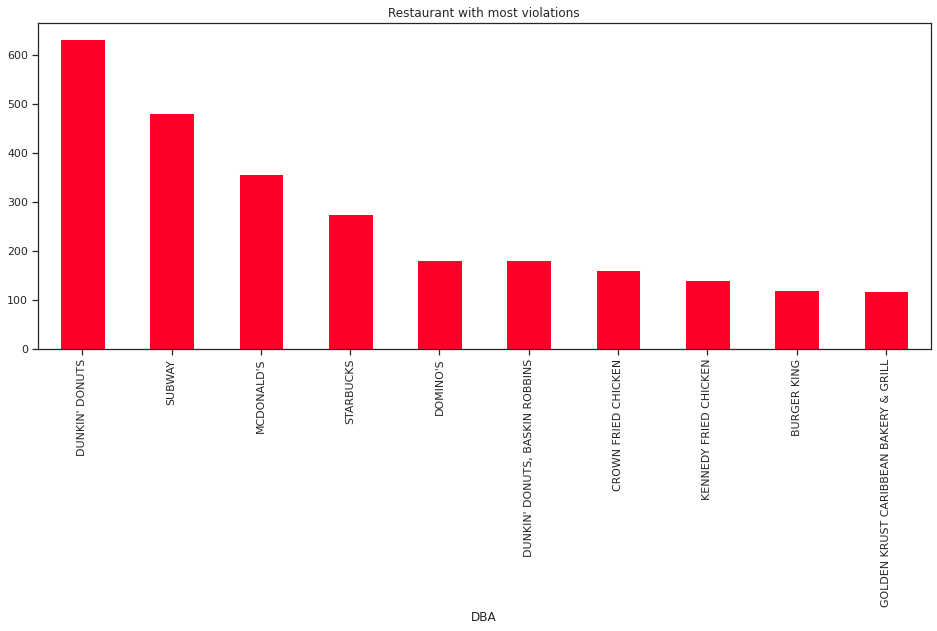

In [517]:
# calualte and plot results
fig, axes = plt.subplots(nrows=1, ncols=1)

test['VIOLATION CODE'].plot(kind='bar', stacked=False, figsize=[16,6], colormap='gist_rainbow', title="Restaurant with most violations")

# **Dates That Highest Violations Occurred# New Section**

In [605]:
# Import Data Libaries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline 
#to plot the graphs inline on jupyter notebook

In [606]:
# Import a scoring metric to compare methods
from sklearn.metrics import r2_score

In [612]:
# Label new dataframe
df = AIRPORTDBA

In [613]:
df.head()

,CAMIS,DBA,AIRPORT,BUILDING,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADEDATE,RECORD DATE,INSPECTION TYPE
0,41701986,LA VILLA CAFE,ABI,505,Spanish,9/30/2016,Violations were cited in the following area(s).,04H,"Raw, cooked or prepared food is adulterated, c...",Critical,12,A,2016-09-30,8/28/2017,Cycle Inspection / Initial Inspection
1,40660748,ALTA,ABI,64,American,9/30/2016,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,8,A,2016-09-30,8/28/2017,Cycle Inspection / Initial Inspection
2,41494987,BROOKLYN FARMACY AND SODA FOUNTAIN,SPS,513,American,9/30/2016,Violations were cited in the following area(s).,10H,Proper sanitization not provided for utensil w...,Not Critical,13,A,2016-09-30,8/28/2017,Cycle Inspection / Re-inspection
3,50050828,KARIBBEAN GREEN,TUS,804,Caribbean,9/30/2016,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Critical,13,A,2016-09-30,8/28/2017,Cycle Inspection / Initial Inspection
4,50012518,RED STAR sandwich shop,DSM,176,Asian,9/30/2016,Establishment re-opened by DOHMH,04L,Evidence of mice or live mice present in facil...,Critical,9,P,2016-09-30,8/28/2017,Cycle Inspection / Reopening Inspection


In [614]:
# Converting the column to DateTime format
df['GRADEDATE'] = pd.to_datetime(df['GRADEDATE'], format='%m/%d/%Y')
df = df.set_index('GRADEDATE')
df.head()

,CAMIS,DBA,AIRPORT,BUILDING,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,RECORD DATE,INSPECTION TYPE
GRADEDATE,,,,,,,,,,,,,,
2016-09-30,41701986,LA VILLA CAFE,ABI,505,Spanish,9/30/2016,Violations were cited in the following area(s).,04H,"Raw, cooked or prepared food is adulterated, c...",Critical,12,A,8/28/2017,Cycle Inspection / Initial Inspection
2016-09-30,40660748,ALTA,ABI,64,American,9/30/2016,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,8,A,8/28/2017,Cycle Inspection / Initial Inspection
2016-09-30,41494987,BROOKLYN FARMACY AND SODA FOUNTAIN,SPS,513,American,9/30/2016,Violations were cited in the following area(s).,10H,Proper sanitization not provided for utensil w...,Not Critical,13,A,8/28/2017,Cycle Inspection / Re-inspection
2016-09-30,50050828,KARIBBEAN GREEN,TUS,804,Caribbean,9/30/2016,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Critical,13,A,8/28/2017,Cycle Inspection / Initial Inspection
2016-09-30,50012518,RED STAR sandwich shop,DSM,176,Asian,9/30/2016,Establishment re-opened by DOHMH,04L,Evidence of mice or live mice present in facil...,Critical,9,P,8/28/2017,Cycle Inspection / Reopening Inspection


In [630]:
# Group and sort colum data
gp=df.groupby(['GRADEDATE']).count()  

In [ ]:
# Check grouped head table info
gp.head(10)

In [634]:
# Sort values by column
test=gp.sort_values(by='GRADEDATE', ascending=False)[:10]

In [ ]:
# Print test sample of sorted grouped data
print(test)

In [ ]:
# calualte and plot results
fig, axes = plt.subplots(nrows=1, ncols=1)

test['DBA'].plot(kind='barh', stacked=False, figsize=[16,6], colormap='gist_rainbow', title="Violation Dates")

In [585]:
print(date)

0       2016-09-30
1       2016-09-30
2       2016-09-30
3       2016-09-30
4       2016-09-30
           ...    
18410   2015-01-28
18411   2015-01-28
18412   2015-01-28
18413   2015-01-28
18414   2015-01-28
Name: GRADEDATE, Length: 18415, dtype: datetime64[ns]


In [ ]:
# Get stat data on columns used for calulations
print(air.GRADEDATE.describe()) 

date = air.GRADEDATE

count                   18415
unique                    713
top       2015-05-20 00:00:00
freq                       83
first     2013-03-14 00:00:00
last      2017-08-25 00:00:00
Name: GRADEDATE, dtype: object


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


In [591]:
# Replace missing values in column 1 with most frequent feature
date.fillna('2015-05-20', inplace=True)
print(date)

0       2016-09-30
1       2016-09-30
2       2016-09-30
3       2016-09-30
4       2016-09-30
           ...    
18410   2015-01-28
18411   2015-01-28
18412   2015-01-28
18413   2015-01-28
18414   2015-01-28
Name: GRADEDATE, Length: 18415, dtype: datetime64[ns]


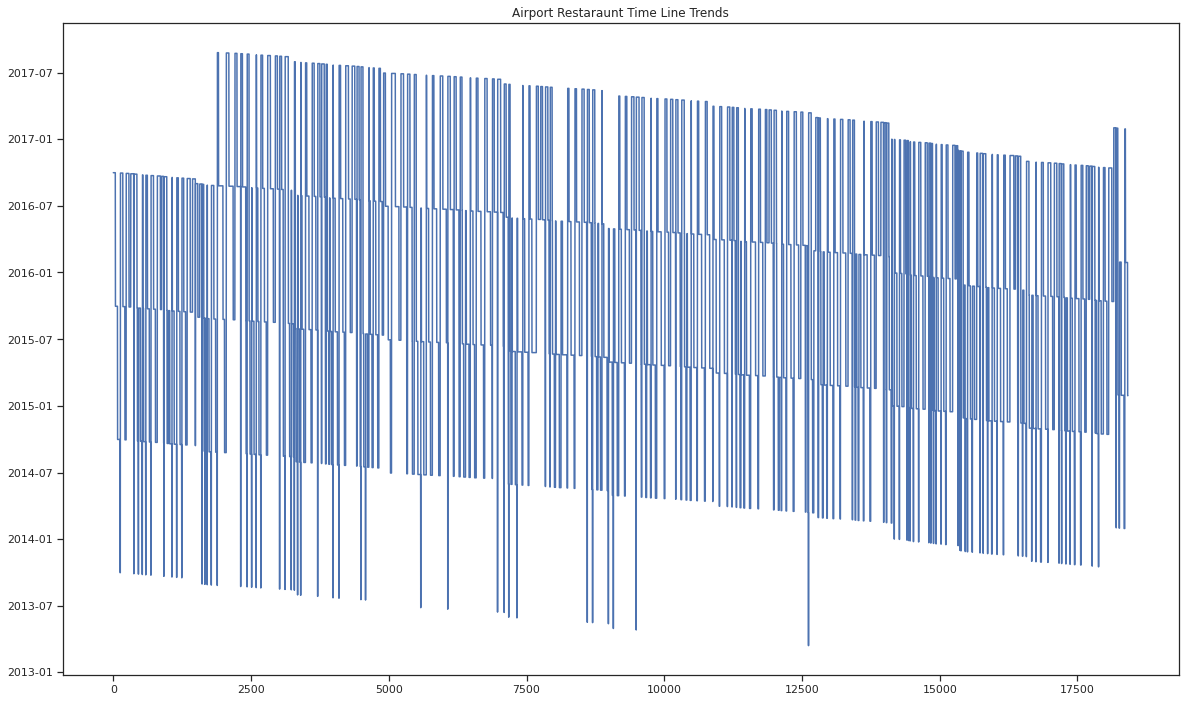

In [650]:
date.plot(style=['b-','ko', 'r', 'rx*'], figsize=(20, 12), title='Airport Restaraunt Time Line Trends');

In [ ]:
# Filling using mean or median
# Creating a column in the dataframe
# instead of : df['NewCol']=0, we use
# df = df.assign(NewCol=default_value)
# to avoid pandas warning.

# date = date.assign(FillMean=date.target.fillna(date.target.mean()))
# date = date.assign(FillMedian=date.target.fillna(date.target.median()))

In [ ]:
# # imputing using the rolling average
# df = df.assign(RollingMean=df.target.fillna(df.target.rolling(24,min_periods=1,).mean()))
# # imputing using the rolling median
# df = df.assign(RollingMedian=df.target.fillna(df.target.rolling(24,min_periods=1,).median()))# imputing using the median

In [ ]:
# Check grouped head table info
gp.head(10)

In [ ]:
# Sort values by column
test=gp.sort_values(by='VIOLATION CODE', ascending=False)[:10]

In [ ]:
# Print test sample of sorted grouped data
print(test)

In [ ]:
# calualte and plot results
fig, axes = plt.subplots(nrows=1, ncols=1)

test['VIOLATION CODE'].plot(kind='bar', stacked=False, figsize=[16,6], colormap='gist_rainbow', title="Restaurant with most violations")

# **Restaurant With Most Recurring Violations.**

In [518]:
# Import Data Libaries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline 
#to plot the graphs inline on jupyter notebook

# **Departure Delay**

In [ ]:
flight=pd.read_csv(r'C:\Users\b.tasker\Desktop\MODULE 6 Flight Data.csv')

In [ ]:
delay=flight.groupby('AIRLINE', as_index=False)['DEPARTURE_DELAY'].mean()

In [ ]:
print(delay)

In [ ]:
print(delay['DEPARTURE_DELAY'].plot(kind='bar', stacked=False, figsize=[16,6], colormap='winter'))

In [ ]:
which origin and destination airports have the longest delayed flight times on average. 

In [ ]:
airz=flight.groupby(['ORIGIN_AIRPORT','DESTINATION_AIRPORT'], as_index=False)['ARRIVAL_DELAY'].mean().max()

In [ ]:
print(airz)

ORIGIN_AIRPORT         YUM
DESTINATION_AIRPORT    YUM
ARRIVAL_DELAY          381
dtype: object


In [ ]:
Lastly they would like to know the average delay in departure time per airport by starting destination. 

In [ ]:
delay2=flight.groupby(['AIRLINE','ORIGIN_AIRPORT'], as_index=False)['DEPARTURE_DELAY'].mean()

In [ ]:
print(delay2.describe())

In [ ]:
A=delay2.sort_values("DEPARTURE_DELAY", axis = 0, ascending = False, 
                 inplace = False, na_position ='last') 

In [ ]:
B=A[:15]

# LINKS AND **RESOURCES**

In [ ]:
#https://mode.com/python-tutorial/pandas-groupby-and-python-lambda-functions/

In [ ]:
#https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b

In [ ]:
#http://jalammar.github.io/gentle-visual-intro-to-data-analysis-python-pandas/

In [ ]:
#https://towardsdatascience.com/data-visualization-exploration-using-pandas-only-beginner-a0a52eb723d5